In [1]:
%%time
import malaya

CPU times: user 10.8 s, sys: 949 ms, total: 11.8 s
Wall time: 12.6 s


In [2]:
%matplotlib inline

import pandas as pd
df = pd.read_csv('tests/02032018.csv',sep=';')
df = df.iloc[3:,1:]
df.columns = ['text','label']
corpus = df.text.tolist()

## Generate scatter plot for unsupervised clustering

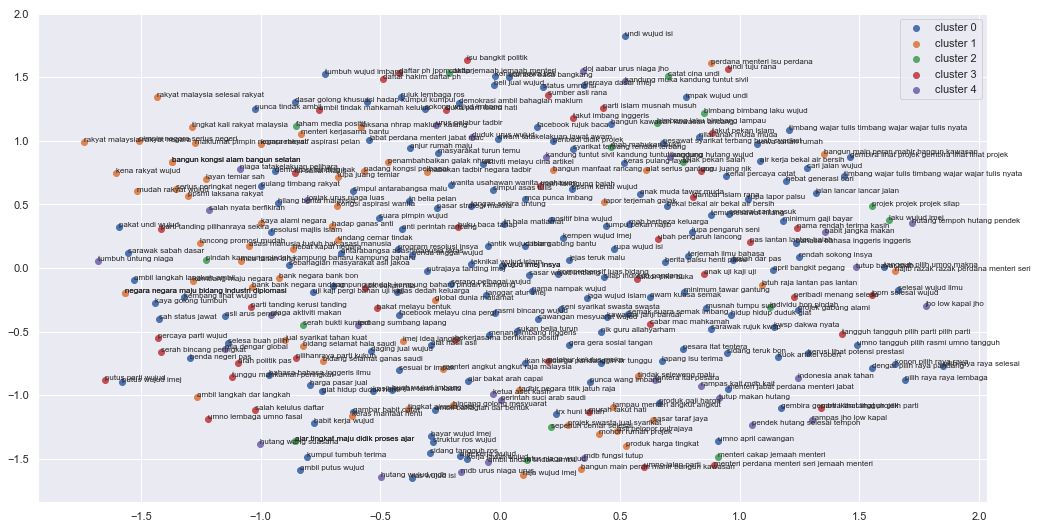

In [3]:
result_scatter = malaya.cluster.cluster_scatter(corpus,vectorizer='tfidf')

## Generate dendogram plot for unsupervised clustering

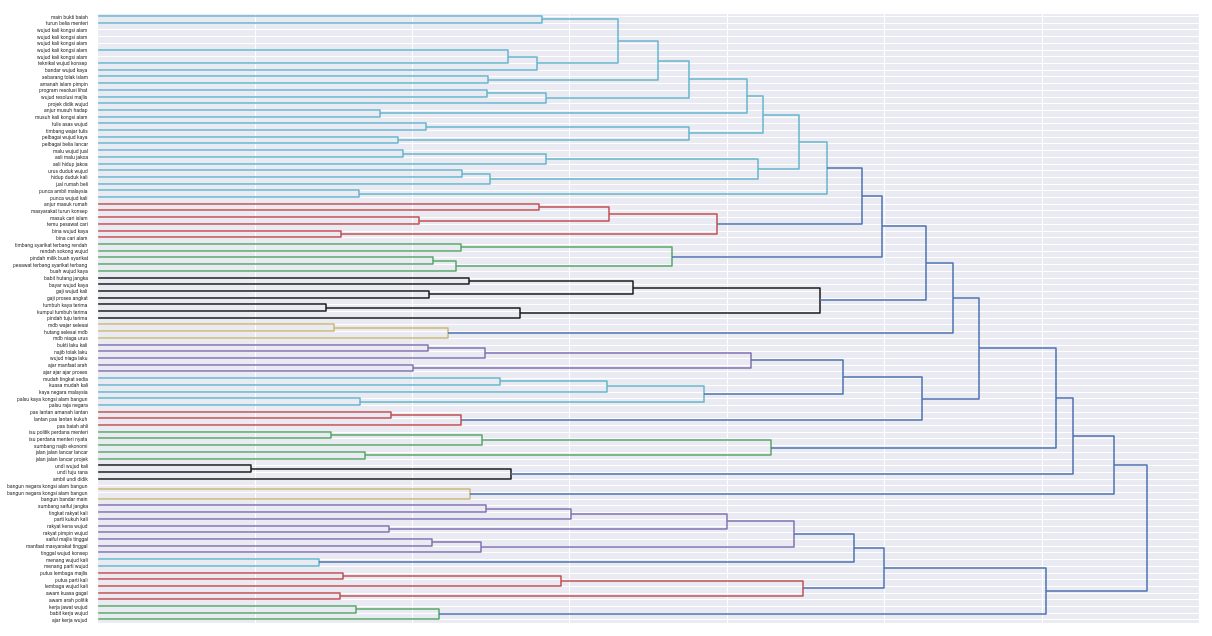

In [4]:
result_scatter = malaya.cluster.cluster_dendogram(corpus,vectorizer='tfidf')

## Generate undirected graph for unsupervised clustering

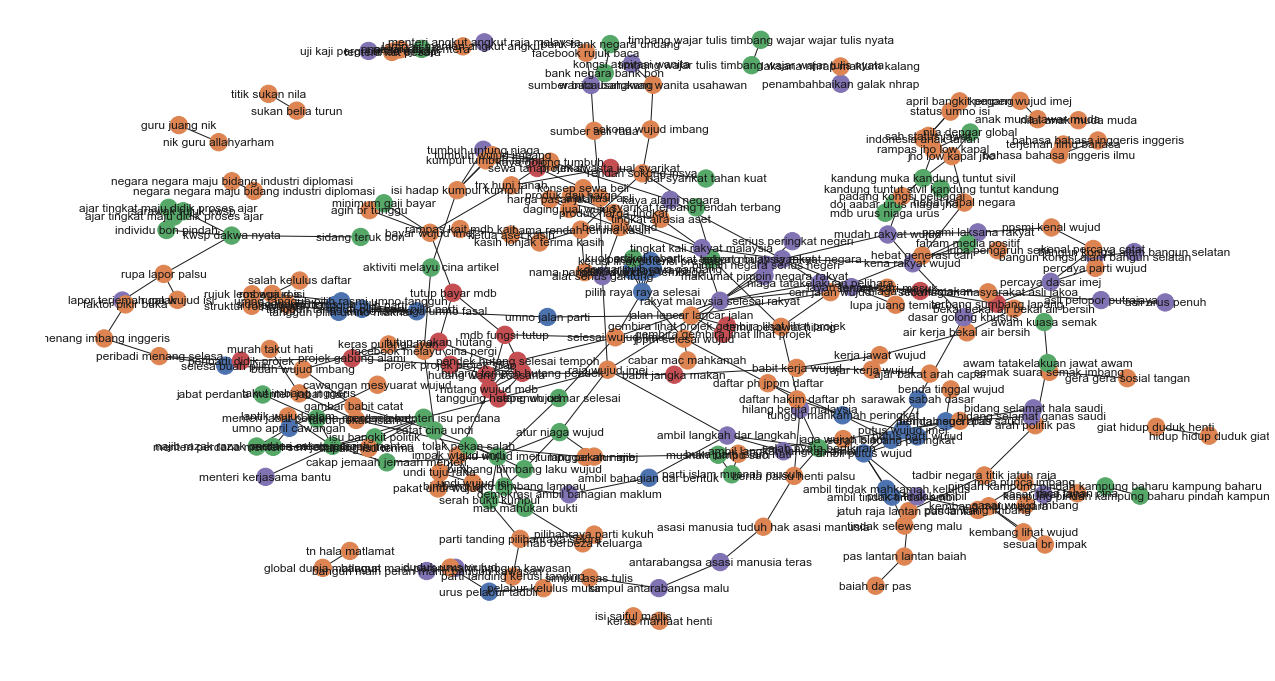

In [5]:
result_scatter = malaya.cluster.cluster_graph(corpus,vectorizer='tfidf')

## Cluster same word structure based on POS and Entities

In [6]:
string = 'KUALA LUMPUR: Sempena sambutan Aidilfitri minggu depan, Perdana Menteri Tun Dr Mahathir Mohamad dan Menteri Pengangkutan Anthony Loke Siew Fook menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing. Dalam video pendek terbitan Jabatan Keselamatan Jalan Raya (JKJR) itu, Dr Mahathir menasihati mereka supaya berhenti berehat dan tidur sebentar  sekiranya mengantuk ketika memandu.'

In [7]:
bahdanau_entities = malaya.entity.deep_model('bahdanau')
bahdanau_pos = malaya.pos.deep_model('bahdanau')

In [8]:
result_entities = bahdanau_entities.predict(string)
result_pos = bahdanau_pos.predict(string)

In [9]:
generated_grams = malaya.generator.pos_entities_ngram(
    result_pos,
    result_entities,
    ngram = (1, 3),
    accept_pos = ['NOUN', 'PROPN', 'VERB'],
    accept_entities = ['law', 'location', 'organization', 'person', 'time'],
)
generated_grams

['Jkjr Dr Mahathir',
 'Raya Jkjr',
 'kampung halaman',
 'mahu',
 'halaman',
 'Dr',
 'sambutan',
 'Kuala Lumpur Sempena',
 'Fook menitipkan',
 'Mahathir Mohamad',
 'sambutan Aidilfitri minggu',
 'halaman masing-masing video',
 'minggu depan',
 'Raya',
 'sekiranya mengantuk',
 'Dr Mahathir menasihati',
 'tidur sekiranya',
 'Mohamad Menteri',
 'terbitan Jabatan',
 'Aidilfitri minggu',
 'menasihati berhenti',
 'Sempena',
 'terbitan Jabatan Keselamatan',
 'Mahathir',
 'video terbitan',
 'pulang',
 'Perdana Menteri',
 'depan Perdana',
 'Pengangkutan Anthony',
 'Kuala Lumpur',
 'depan',
 'menitipkan pesanan',
 'kampung halaman masing-masing',
 'berhenti berehat',
 'masing-masing video terbitan',
 'Loke',
 'menitipkan',
 'Jkjr',
 'Pengangkutan',
 'Jabatan',
 'minggu depan Perdana',
 'Anthony',
 'berehat tidur sekiranya',
 'Tun',
 'tidur sekiranya mengantuk',
 'Mahathir Mohamad Menteri',
 'Loke Siew Fook',
 'Tun Dr',
 'Dr Mahathir Mohamad',
 'Mahathir menasihati berhenti',
 'Anthony Loke Siew',

In [10]:
malaya.cluster.cluster_words(generated_grams)

['Jkjr Dr Mahathir',
 'menitipkan pesanan orang',
 'mahu pulang kampung',
 'Sempena sambutan Aidilfitri',
 'Tun Dr Mahathir',
 'berhenti berehat tidur',
 'pesanan orang ramai',
 'orang ramai mahu',
 'Menteri Tun Dr',
 'kampung halaman masing-masing',
 'pulang kampung halaman',
 'Kuala Lumpur Sempena',
 'video terbitan Jabatan',
 'masing-masing video terbitan',
 'Jabatan Keselamatan Jalan',
 'Perdana Menteri Tun',
 'Aidilfitri minggu depan',
 'Mohamad Menteri Pengangkutan',
 'berehat tidur sekiranya',
 'sambutan Aidilfitri minggu',
 'minggu depan Perdana',
 'Jalan Raya Jkjr',
 'tidur sekiranya mengantuk',
 'Mahathir Mohamad Menteri',
 'halaman masing-masing video',
 'menasihati berhenti berehat',
 'Loke Siew Fook',
 'depan Perdana Menteri',
 'Dr Mahathir Mohamad',
 'Dr Mahathir menasihati',
 'Menteri Pengangkutan Anthony',
 'Mahathir menasihati berhenti',
 'Anthony Loke Siew',
 'Fook menitipkan pesanan',
 'sekiranya mengantuk memandu',
 'terbitan Jabatan Keselamatan',
 'Pengangkutan Ant

## Cluster Part-Of-Speech

In [11]:
malaya.cluster.cluster_pos(result_pos)

{'ADJ': ['khas', 'pendek'],
 'ADP': ['depan', 'kepada', 'ke', 'Dalam'],
 'ADV': ['sebentar'],
 'ADX': [],
 'CCONJ': ['dan'],
 'DET': ['itu'],
 'NOUN': ['sambutan',
  'pesanan',
  'orang ramai',
  'kampung halaman masing-masing',
  'video',
  'terbitan Jabatan Keselamatan',
  'Jkjr',
  'berehat',
  'sekiranya mengantuk'],
 'NUM': [],
 'PART': [],
 'PRON': ['yang', 'mereka'],
 'PROPN': ['Kuala Lumpur Sempena',
  'Aidilfitri',
  'Perdana Menteri Tun Dr Mahathir Mohamad',
  'Menteri Pengangkutan Anthony Loke Siew Fook',
  'Jalan Raya',
  'Dr Mahathir'],
 'SCONJ': ['supaya', 'ketika'],
 'SYM': [],
 'VERB': ['minggu',
  'menitipkan',
  'mahu pulang',
  'menasihati',
  'berhenti',
  'tidur'],
 'X': []}

In [12]:
malaya.cluster.cluster_entities(result_entities)

{'OTHER': ['sempena',
  'dan',
  'menitipkan pesanan khas kepada orang ramai yang mahu pulang ke kampung halaman masing-masing dalam video pendek terbitan',
  'itu'],
 'law': [],
 'location': ['kuala lumpur'],
 'organization': ['menteri pengangkutan', 'jabatan keselamatan jalan raya'],
 'person': ['perdana menteri tun dr mahathir mohamad',
  'anthony loke siew fook',
  'jkjr',
  'dr mahathir'],
 'quantity': [],
 'time': ['minggu depan'],
 'event': ['sambutan aidilfitri']}